In [529]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm

from sklearn.preprocessing import scale
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.cluster import KMeans
from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics.cluster import rand_score

In [530]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [531]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
chronic_kidney_disease = fetch_ucirepo(id=336) 
  
# data (as pandas dataframes) 
X = chronic_kidney_disease.data.features 
y = chronic_kidney_disease.data.targets 
  
# metadata 
print(chronic_kidney_disease.metadata) 

# variable information 
print(chronic_kidney_disease.variables) 

{'uci_id': 336, 'name': 'Chronic Kidney Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/336/chronic+kidney+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/336/data.csv', 'abstract': 'This dataset can be used to predict the chronic kidney disease and it can be collected from the hospital nearly 2 months of period.', 'area': 'Other', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 400, 'num_features': 24, 'feature_types': ['Real'], 'demographics': ['Age'], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2015, 'last_updated': 'Mon Mar 04 2024', 'dataset_doi': '10.24432/C5G020', 'creators': ['L. Rubini', 'P. Soundarapandian', 'P. Eswaran'], 'intro_paper': None, 'additional_info': {'summary': 'We use the following representation to collect the dataset\r\n                        age\t\t-\tage\t\r\n\t\t\tbp\t\t-\tblood pressure\r\n\t\t\tsg\t

In [532]:
print(X)

      age    bp     sg   al   su     rbc        pc         pcc          ba  \
0    48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent  notpresent   
1     7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent  notpresent   
2    62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3    48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4    51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   
..    ...   ...    ...  ...  ...     ...       ...         ...         ...   
395  55.0  80.0  1.020  0.0  0.0  normal    normal  notpresent  notpresent   
396  42.0  70.0  1.025  0.0  0.0  normal    normal  notpresent  notpresent   
397  12.0  80.0  1.020  0.0  0.0  normal    normal  notpresent  notpresent   
398  17.0  60.0  1.025  0.0  0.0  normal    normal  notpresent  notpresent   
399  58.0  80.0  1.025  0.0  0.0  normal    normal  notpresent  notpresent   

       bgr  ...  hemo   pcv    wbcc  rbcc  htn   dm  cad  appet

In [533]:
X.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,329.000000,294.000000,269.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,8.990105,2944.474190,1.025323
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,32.000000,6500.000000,3.900000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,40.000000,8000.000000,4.800000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,45.000000,9800.000000,5.400000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000


In [534]:
print(y)

      class
0       ckd
1       ckd
2       ckd
3       ckd
4       ckd
..      ...
395  notckd
396  notckd
397  notckd
398  notckd
399  notckd

[400 rows x 1 columns]


In [535]:
type_counts = y.value_counts()

print(type_counts)

class 
ckd       248
notckd    150
ckd\t       2
dtype: int64


In [536]:
cd Chronic-Kidney-Disease-Analysis-Group13


[Errno 2] No such file or directory: 'Chronic-Kidney-Disease-Analysis-Group13'
/Users/daisy/Desktop/3DA3/Chronic-Kidney-Disease-Analysis-Group13


1. Classification Problem Identification

We aimed at examining chronic kidney disease by machine learning in aspects of predicting the risk, conducting diagnosis, and managing therapy, extracting 24 relevant variables. According to the assignment overview, we are aimed to focus on the dataset from Chronic Kidney Disease specifically with 250 early-stage CKD patients and 150 healthy controls. However, there are 248 "ckd" (patients having Chronic Kidney Disease), 150 "nockd" (patients considered as healthy controls) and 2 "ckd\t". The presence of "ckd\t" with special character deviates from our original purpose and might lead to a classification problem. We are required to transfer "ckd\t" to "ckd" in our further steps to ensure data consistency.
By analyzing the correlation between variables, we can define their relation to our classification, which is having chronic kidney disease or not chronic kidney disease. This finding is not only significant for early diagnosis and treatment of the disease but also serves as a valuable reference for further research.

2. Variable Transformation

In [537]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

In [538]:
y= y.replace('ckd\t', 'ckd')
y.value_counts()

class 
ckd       250
notckd    150
dtype: int64

In [539]:
type_counts_dm = X['dm'].value_counts()

print(type_counts_dm)

no      260
yes     137
\tno      1
Name: dm, dtype: int64


In [540]:
X['dm']= X['dm'].replace('\tno', 'no')

/var/folders/27/kc7sc3n15q94jvxnwh_m6y3h0000gn/T/ipykernel_85492/2844157822.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['dm']= X['dm'].replace('\tno', 'no')


In [541]:
type_counts_dm = X['dm'].value_counts()

print(type_counts_dm)

no     261
yes    137
Name: dm, dtype: int64


By rearranging the unusual performance in X and y, our dataset now achieved the variable transformation.

3. Dataset Overview

In [542]:
y.dtypes

class    object
dtype: object

In [543]:
X.dtypes

age      float64
bp       float64
sg       float64
al       float64
su       float64
rbc       object
pc        object
pcc       object
ba        object
bgr      float64
bu       float64
sc       float64
sod      float64
pot      float64
hemo     float64
pcv      float64
wbcc     float64
rbcc     float64
htn       object
dm        object
cad       object
appet     object
pe        object
ane       object
dtype: object

In [544]:
X.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,329.000000,294.000000,269.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,8.990105,2944.474190,1.025323
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,32.000000,6500.000000,3.900000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,40.000000,8000.000000,4.800000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,45.000000,9800.000000,5.400000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000


1. In our dataset, we divided it into two sub dataset. We define the classification, which is our predict variable, as y; and we define X as a dataset with other variables. The variables in x are people's Physical indicator data, while our classification is the result that people having or not having the disease.
2. We can see that our y dataset, which is our classification, in consisted by object datatype; our X datase is consisted with float64 and object. 'age', 'bp', 'sg', 'al', 'su', , 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo','pcv', 'wbcc', 'rbcc' are float64 type, and 'rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe','ane' are object type.
3. Observation counts of 14 variables displaying the reaction of the response are shown by the table above in its column count. Since we know the total counts should be 400 in y, those data indicates the presence of missing values.

4. Association Between Variables

In [545]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [546]:
import seaborn as sns
import matplotlib.pyplot as plt

/var/folders/27/kc7sc3n15q94jvxnwh_m6y3h0000gn/T/ipykernel_85492/2494445732.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(X.corr(), annot = True)


<Axes: >

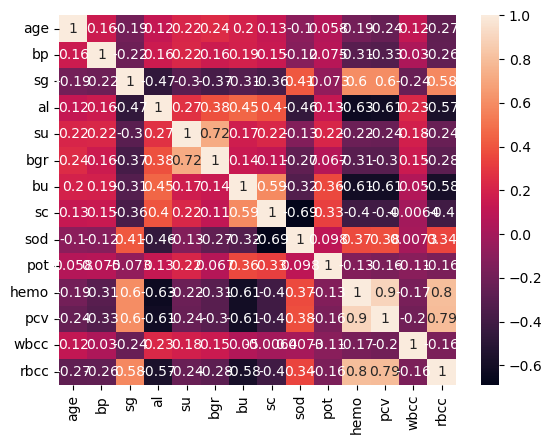

In [547]:
sns.heatmap(X.corr(), annot = True)

The correlation plot is shown as above. The icon on the right indicates the correlation range. From the plot, it displays the correlation between those above features ranging from -0.69 to 1. Each variable has the largest positive correlation to themsevles, while the correlation of sod and sc obtains the lowest value -0.69, implying that as sod increases, sc tends to decrease.

5. Missing Value Analysis and Handling

In [548]:
X.isna().sum()

age        9
bp        12
sg        47
al        46
su        49
rbc      152
pc        65
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       71
wbcc     106
rbcc     131
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
dtype: int64

Here, we find that several NAs in our dataset X. Considering the influence of outliers in analysis, we have chosen the median value to replace all NAs in numeric variables, which is shows as 'float64', and we have selected the mode to replace the NAs in the character variables.

In [549]:
numeric_vars = X.select_dtypes(include='float64')
char_vars = X.select_dtypes(include='object')

# Replace missing values in numeric variables with median
numeric_filled = numeric_vars.fillna(numeric_vars.median())
# Replace missing values in character variables with mode
char_filled = char_vars.apply(lambda x: x.fillna(x.mode()[0]))

dataX = pd.concat([numeric_filled, char_filled], axis=1)



In [550]:
dataX.isna().sum()

age      0
bp       0
sg       0
al       0
su       0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
wbcc     0
rbcc     0
rbc      0
pc       0
pcc      0
ba       0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
dtype: int64

6. Outlier Analysis

Due to our consideration, we find that the variable 'age' should be excluded when we managing outliers. It is meaningless to dealing with outliers of people's age.

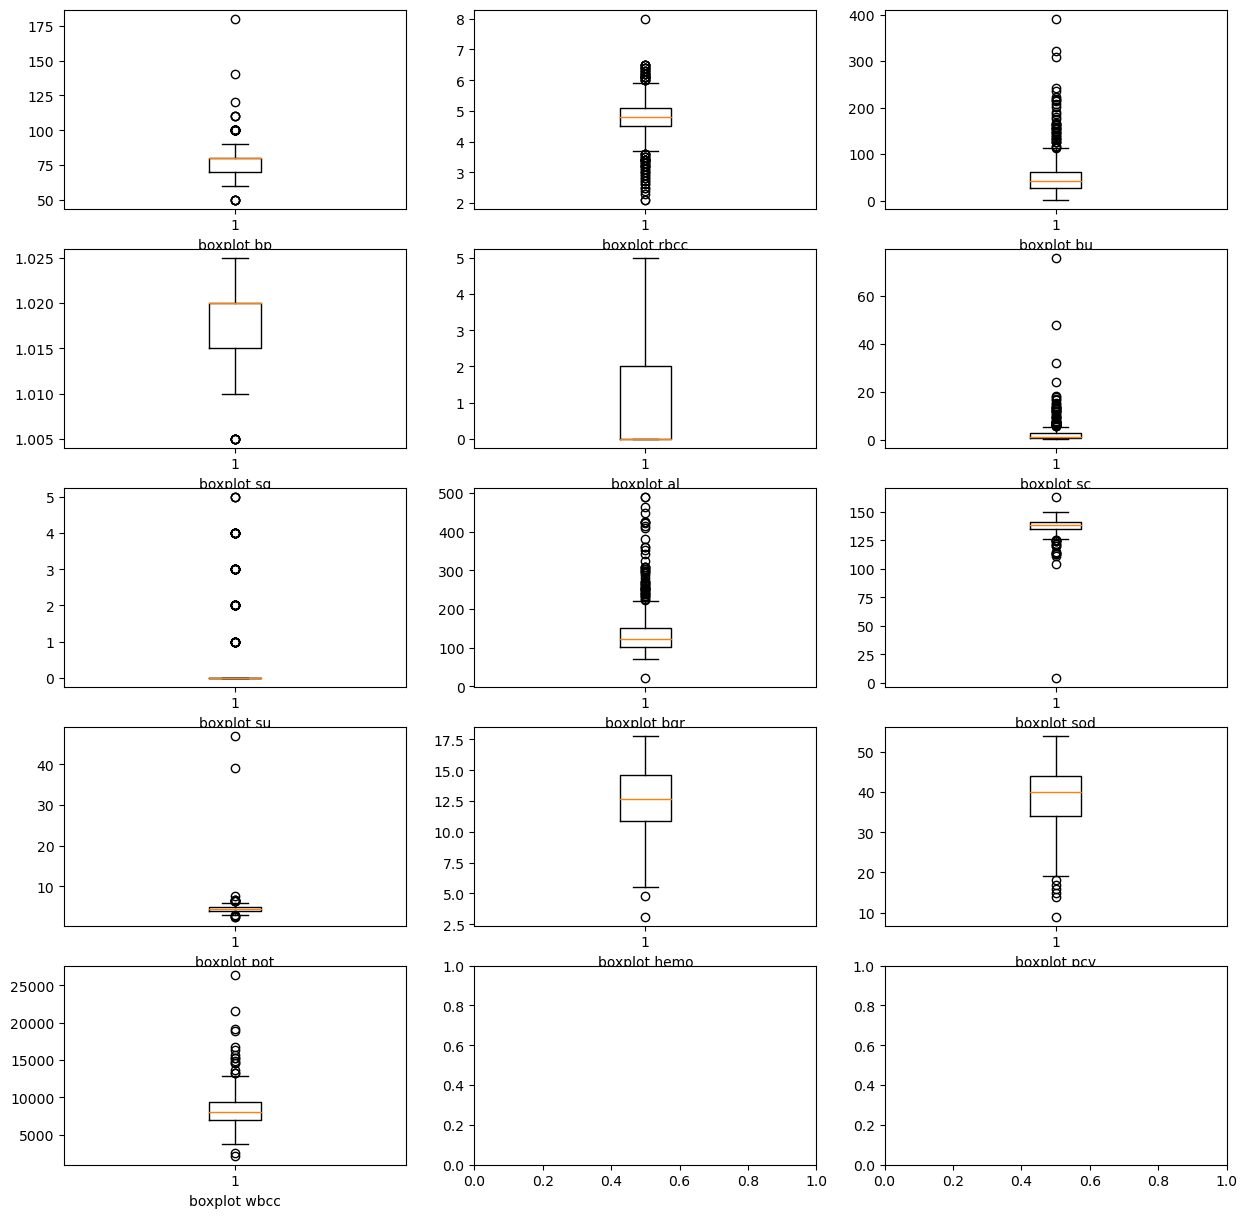

In [551]:
figure, axe = plt.subplots(5,3,figsize=(15,15))
axe[0,0].boxplot(dataX['bp'])
axe[0,0].set_xlabel("boxplot bp")
axe[0,1].boxplot(dataX['rbcc'])
axe[0,1].set_xlabel("boxplot rbcc")
axe[0,2].boxplot(dataX['bu'])
axe[0,2].set_xlabel("boxplot bu")

axe[1,0].boxplot(dataX["sg"])
axe[1,0].set_xlabel("boxplot sg")
axe[1,1].boxplot(dataX["al"])
axe[1,1].set_xlabel("boxplot al")
axe[1,2].boxplot(dataX["sc"])
axe[1,2].set_xlabel("boxplot sc")

axe[2,0].boxplot(dataX["su"])
axe[2,0].set_xlabel("boxplot su")
axe[2,1].boxplot(dataX["bgr"])
axe[2,1].set_xlabel("boxplot bgr")
axe[2,2].boxplot(dataX["sod"])
axe[2,2].set_xlabel("boxplot sod")

axe[3,0].boxplot(dataX["pot"])
axe[3,0].set_xlabel("boxplot pot")
axe[3,1].boxplot(dataX["hemo"])
axe[3,1].set_xlabel("boxplot hemo")

axe[3,2].boxplot(dataX["pcv"])
axe[3,2].set_xlabel("boxplot pcv")
axe[4,0].boxplot(dataX["wbcc"])
axe[4,0].set_xlabel("boxplot wbcc")


plt.show()

From the boxplot above, we can observe that the plot of al has no outliers, so we exclude it in our following outlier analysis.

In [587]:
variables = ['sg', 'bp', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc']

for var in variables:
    q1 = dataX[var].quantile(0.25)
    q3 = dataX[var].quantile(0.75)
    iqr = q3 - q1
    
    upper_bound = q3 + 1.5 * iqr
    lower_bound = q1 - 1.5 * iqr
    
    # Identify outliers
    outlier_indices = (dataX[var] < lower_bound) | (dataX[var] > upper_bound)
    
    # Replace outliers with closer bound
    dataX.loc[outlier_indices, var] = dataX.loc[outlier_indices, var].apply(
        lambda x: upper_bound if x > upper_bound else lower_bound
    )

# Check if outliers are replaced
for var in variables:
    print("Outliers for variable '{}':".format(var))
    print(dataX[dataX[var] == upper_bound][var])
    print(dataX[dataX[var] == lower_bound][var])

Outliers for variable 'sg':
Series([], Name: sg, dtype: float64)
Series([], Name: sg, dtype: float64)
Outliers for variable 'bp':
Series([], Name: bp, dtype: float64)
Series([], Name: bp, dtype: float64)
Outliers for variable 'su':
Series([], Name: su, dtype: float64)
Series([], Name: su, dtype: float64)
Outliers for variable 'bgr':
Series([], Name: bgr, dtype: float64)
Series([], Name: bgr, dtype: float64)
Outliers for variable 'bu':
Series([], Name: bu, dtype: float64)
Series([], Name: bu, dtype: float64)
Outliers for variable 'sc':
Series([], Name: sc, dtype: float64)
Series([], Name: sc, dtype: float64)
Outliers for variable 'sod':
Series([], Name: sod, dtype: float64)
Series([], Name: sod, dtype: float64)
Outliers for variable 'pot':
Series([], Name: pot, dtype: float64)
Series([], Name: pot, dtype: float64)
Outliers for variable 'hemo':
Series([], Name: hemo, dtype: float64)
Series([], Name: hemo, dtype: float64)
Outliers for variable 'pcv':
Series([], Name: pcv, dtype: float64)


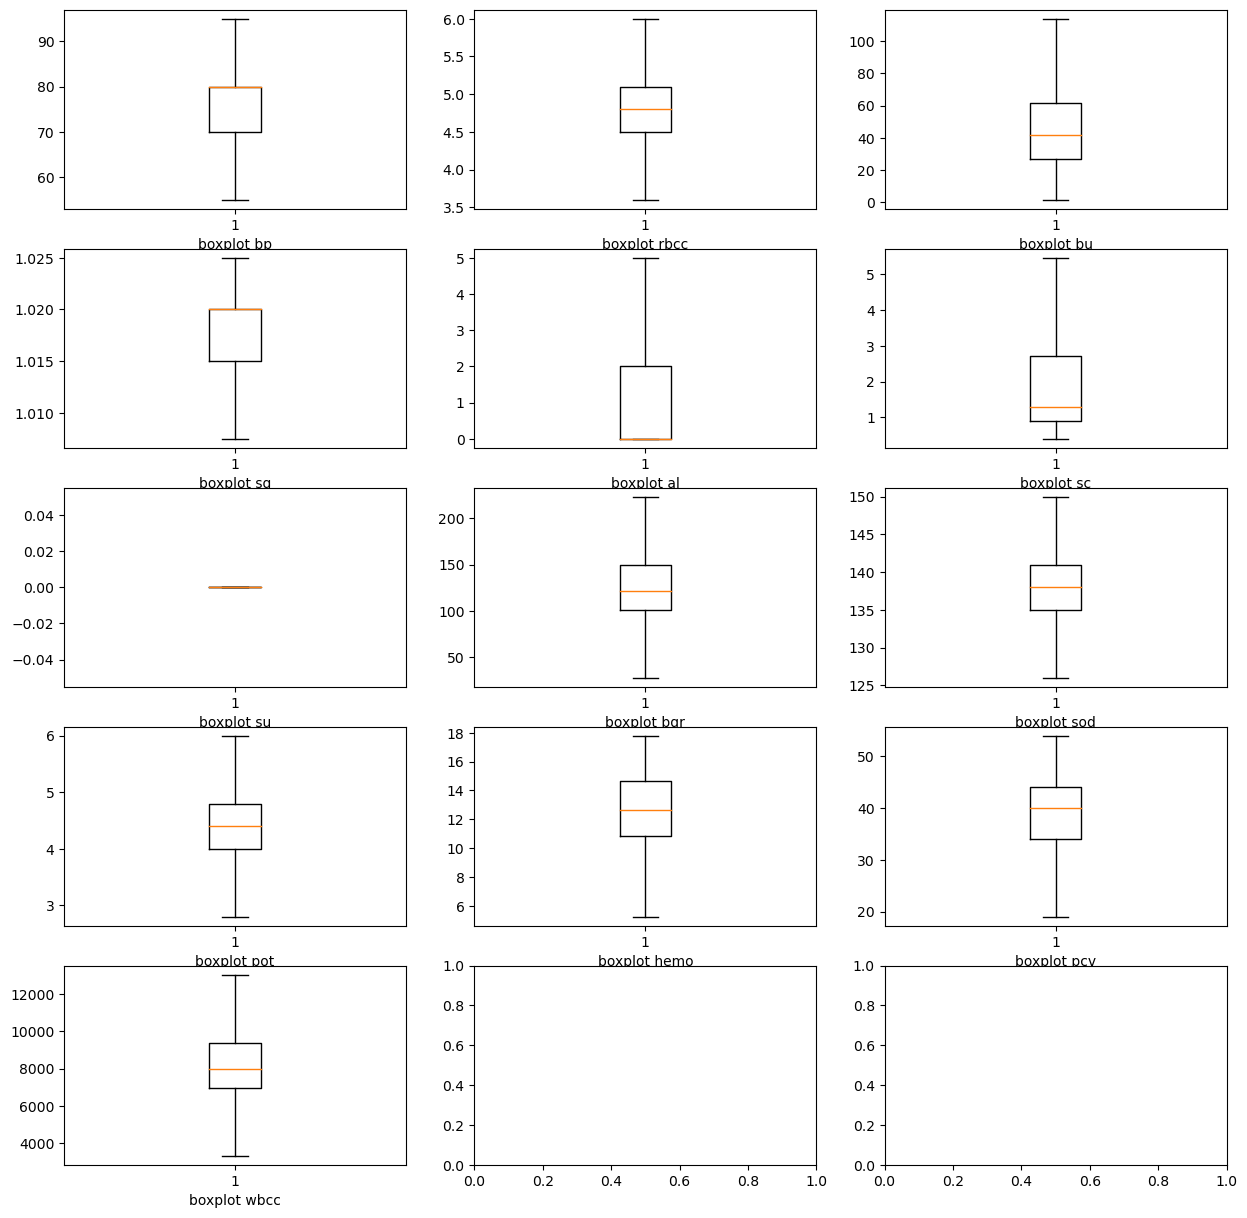

In [588]:
figure, axe = plt.subplots(5,3,figsize=(15,15))
axe[0,0].boxplot(dataX['bp'])
axe[0,0].set_xlabel("boxplot bp")
axe[0,1].boxplot(dataX['rbcc'])
axe[0,1].set_xlabel("boxplot rbcc")
axe[0,2].boxplot(dataX['bu'])
axe[0,2].set_xlabel("boxplot bu")

axe[1,0].boxplot(dataX["sg"])
axe[1,0].set_xlabel("boxplot sg")
axe[1,1].boxplot(dataX["al"])
axe[1,1].set_xlabel("boxplot al")
axe[1,2].boxplot(dataX["sc"])
axe[1,2].set_xlabel("boxplot sc")

axe[2,0].boxplot(dataX["su"])
axe[2,0].set_xlabel("boxplot su")
axe[2,1].boxplot(dataX["bgr"])
axe[2,1].set_xlabel("boxplot bgr")
axe[2,2].boxplot(dataX["sod"])
axe[2,2].set_xlabel("boxplot sod")

axe[3,0].boxplot(dataX["pot"])
axe[3,0].set_xlabel("boxplot pot")
axe[3,1].boxplot(dataX["hemo"])
axe[3,1].set_xlabel("boxplot hemo")

axe[3,2].boxplot(dataX["pcv"])
axe[3,2].set_xlabel("boxplot pcv")
axe[4,0].boxplot(dataX["wbcc"])
axe[4,0].set_xlabel("boxplot wbcc")


plt.show()

In [552]:
variables = ['sg', 'bp', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo','pcv', 'wbcc', 'rbcc']

outliers = {}

for var in variables:

    q1 = dataX[var].quantile(0.25)
    q3 = dataX[var].quantile(0.75)
    iqr = q3 - q1
    
    
    upper_bound = q3 + 1.5 * iqr
    lower_bound = q1 - 1.5 * iqr
  
    outlier_indices = (dataX[var] < lower_bound) | (dataX[var] > upper_bound)
    

    outliers[var] = dataX[var][outlier_indices]

for var, outlier_values in outliers.items():
    print("Outliers for variable '{}':".format(var))
    print(outlier_values)

Outliers for variable 'sg':
3      1.005
29     1.005
48     1.005
55     1.005
76     1.005
87     1.005
154    1.005
Name: sg, dtype: float64
Outliers for variable 'bp':
1       50.0
8      100.0
18     100.0
24     100.0
33     100.0
42     100.0
51     100.0
59     100.0
73     100.0
87     100.0
88     110.0
90     100.0
93     100.0
98     140.0
99     180.0
107    100.0
124    100.0
131     50.0
133    100.0
134    100.0
146    100.0
175     50.0
186     50.0
192    110.0
196    100.0
198    100.0
210    100.0
211    120.0
217    100.0
226    100.0
229     50.0
233    100.0
234    100.0
238    100.0
245    100.0
246    110.0
Name: bp, dtype: float64
Outliers for variable 'su':
2      3.0
7      4.0
10     4.0
12     1.0
14     2.0
      ... 
242    3.0
243    1.0
244    2.0
248    3.0
249    1.0
Name: su, Length: 61, dtype: float64
Outliers for variable 'bgr':
2      423.0
7      410.0
10     490.0
11     380.0
18     263.0
27     264.0
35     270.0
53     246.0
58     253.0
67 

In [589]:
dataX.replace("outlier_values",inplace=True)
dataX

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,...,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane
0,48.0,80.0,1.0200,1.0,0.0,121.0,36.0,1.2,138.0,4.4,...,1,1,0,0,1,1,0,1,0,0
1,7.0,55.0,1.0200,4.0,0.0,121.0,18.0,0.8,138.0,4.4,...,1,1,0,0,0,0,0,1,0,0
2,62.0,80.0,1.0100,2.0,0.0,223.5,53.0,1.8,138.0,4.4,...,1,1,0,0,0,1,0,0,0,1
3,48.0,70.0,1.0075,4.0,0.0,117.0,56.0,3.8,126.0,2.8,...,1,0,1,0,1,0,0,0,1,1
4,51.0,80.0,1.0100,2.0,0.0,106.0,26.0,1.4,138.0,4.4,...,1,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.0200,0.0,0.0,140.0,49.0,0.5,150.0,4.9,...,1,1,0,0,0,0,0,1,0,0
396,42.0,70.0,1.0250,0.0,0.0,75.0,31.0,1.2,141.0,3.5,...,1,1,0,0,0,0,0,1,0,0
397,12.0,80.0,1.0200,0.0,0.0,100.0,26.0,0.6,137.0,4.4,...,1,1,0,0,0,0,0,1,0,0
398,17.0,60.0,1.0250,0.0,0.0,114.0,50.0,1.0,135.0,4.9,...,1,1,0,0,0,0,0,1,0,0


7. Sub-group Analysis

The plots below is the histogram plots of variables with numeric data type.

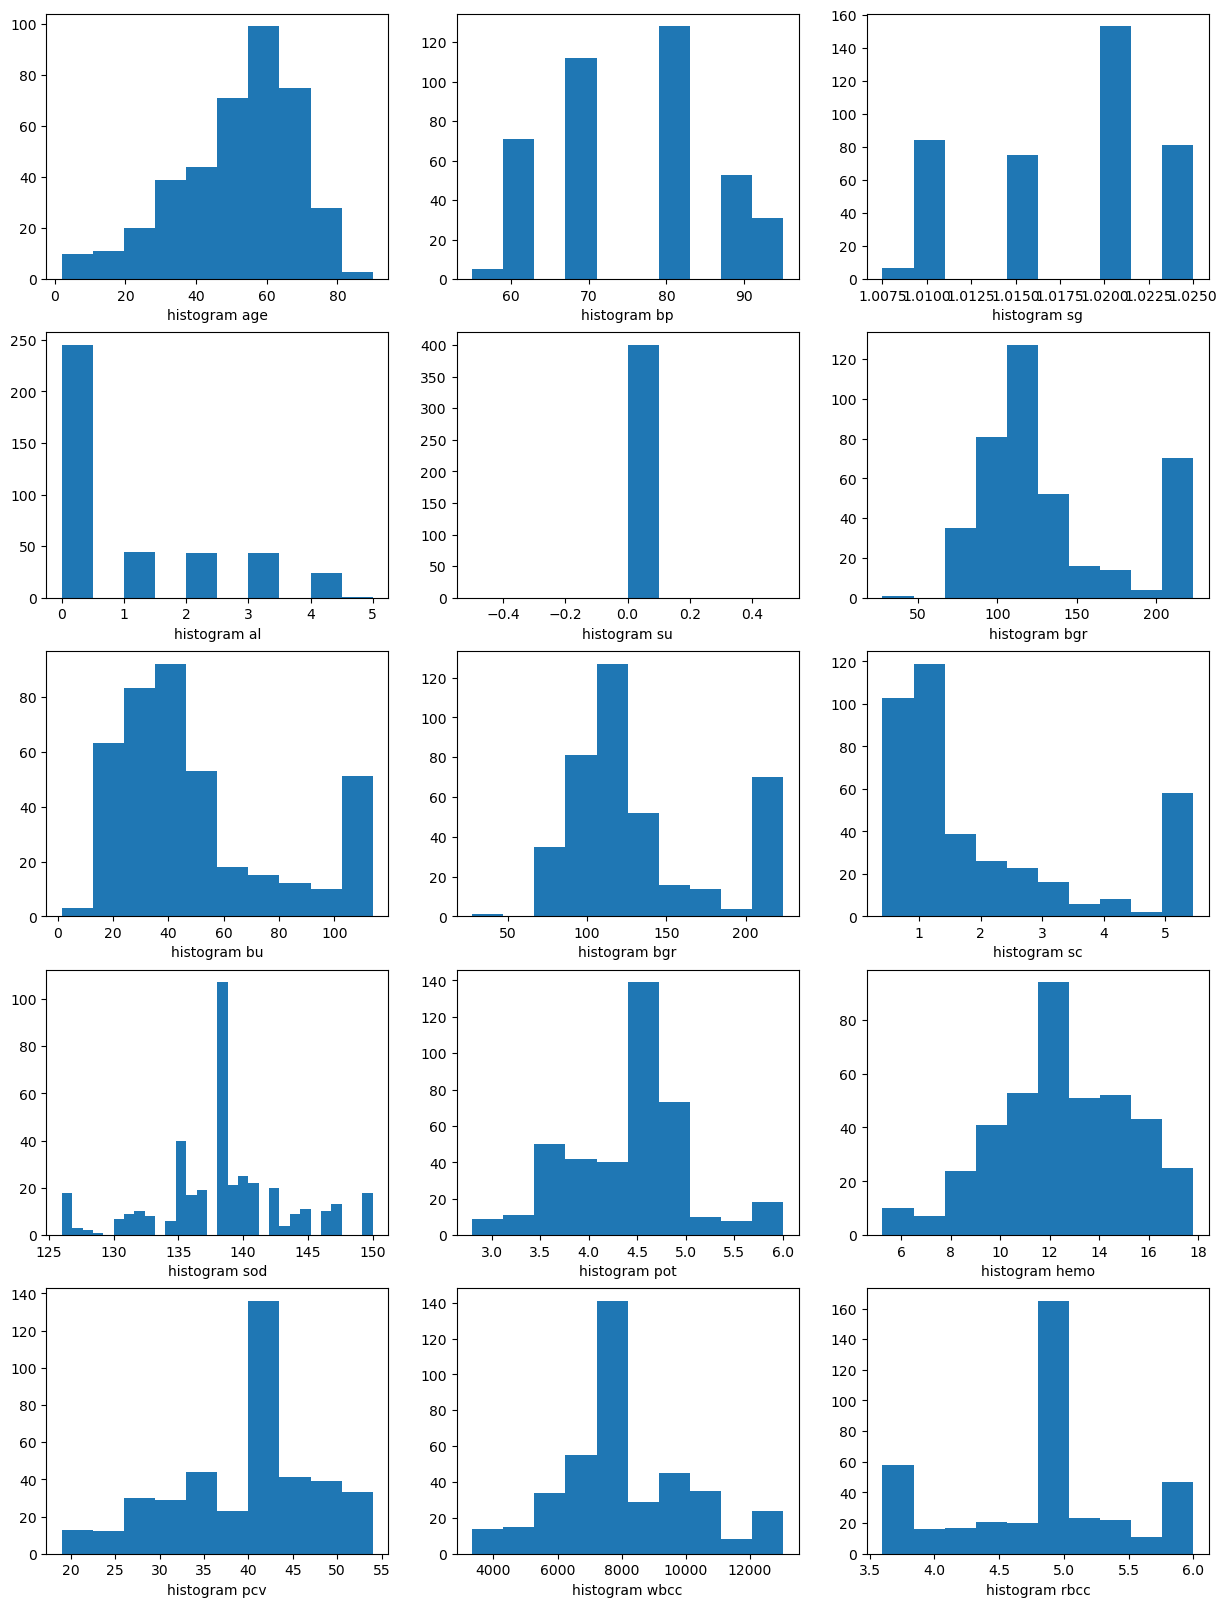

In [590]:
figure, axe = plt.subplots(5,3,figsize=(15, 20))
axe[0,0].hist(dataX['age'])
axe[0,0].set_xlabel("histogram age")
axe[0,1].hist(dataX['bp'])
axe[0,1].set_xlabel("histogram bp")
axe[0,2].hist(dataX['sg'])
axe[0,2].set_xlabel("histogram sg")

axe[1,0].hist(dataX["al"])
axe[1,0].set_xlabel("histogram al")
axe[1,1].hist(dataX["su"])
axe[1,1].set_xlabel("histogram su")
axe[1,2].hist(dataX["bgr"])
axe[1,2].set_xlabel("histogram bgr")

axe[2,0].hist(dataX["bu"])
axe[2,0].set_xlabel("histogram bu")
axe[2,1].hist(dataX["bgr"])
axe[2,1].set_xlabel("histogram bgr")
axe[2,2].hist(dataX["sc"])
axe[2,2].set_xlabel("histogram sc")

axe[3,0].hist(dataX["sod"],bins=30)
axe[3,0].set_xlabel("histogram sod")
axe[3,1].hist(dataX["pot"])
axe[3,1].set_xlabel("histogram pot")
axe[3,2].hist(dataX["hemo"])
axe[3,2].set_xlabel("histogram hemo")

axe[4,0].hist(dataX["pcv"])
axe[4,0].set_xlabel("histogram pcv")
axe[4,1].hist(dataX["wbcc"])
axe[4,1].set_xlabel("histogram wbcc")
axe[4,2].hist(dataX["rbcc"])
axe[4,2].set_xlabel("histogram rbcc")



plt.show()


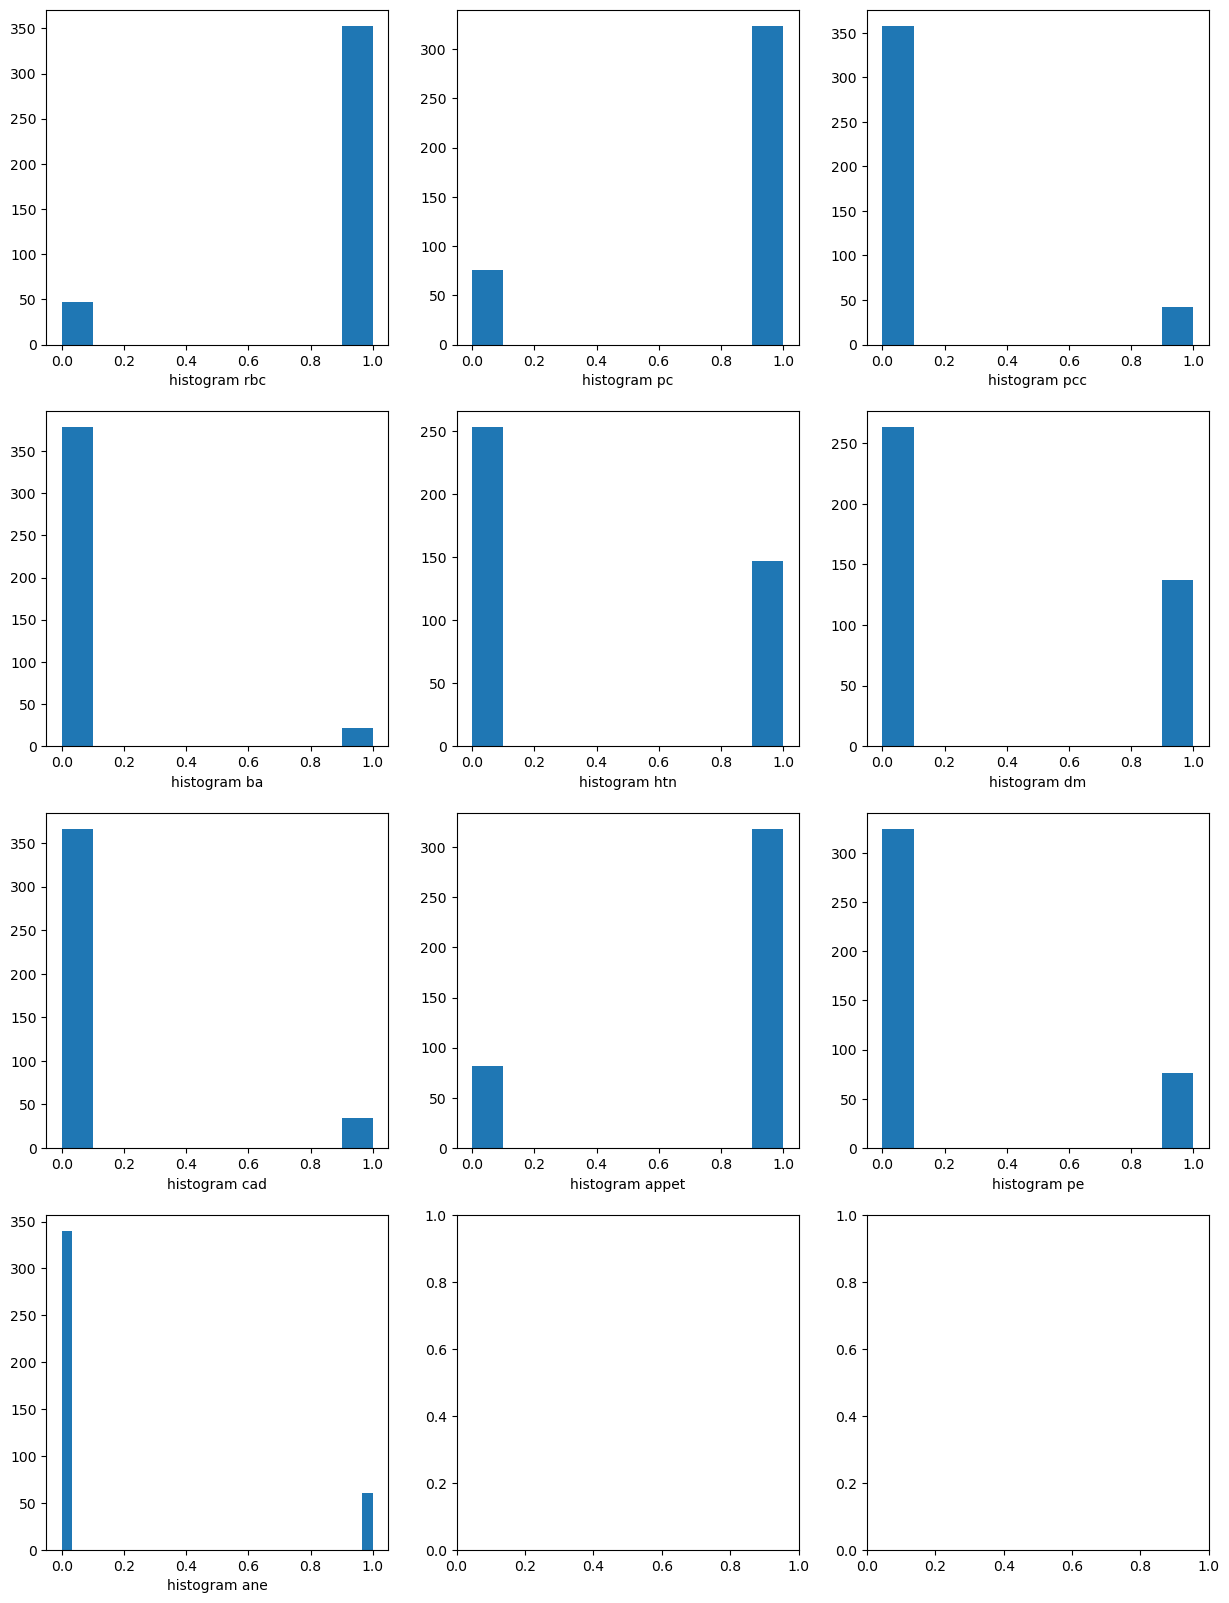

In [591]:
figure, axe = plt.subplots(4,3,figsize=(15, 20))
axe[0,0].hist(dataX['rbc'])
axe[0,0].set_xlabel("histogram rbc")
axe[0,1].hist(dataX['pc'])
axe[0,1].set_xlabel("histogram pc")
axe[0,2].hist(dataX['pcc'])
axe[0,2].set_xlabel("histogram pcc")

axe[1,0].hist(dataX["ba"])
axe[1,0].set_xlabel("histogram ba")
axe[1,1].hist(dataX["htn"])
axe[1,1].set_xlabel("histogram htn")
axe[1,2].hist(dataX["dm"])
axe[1,2].set_xlabel("histogram dm")

axe[2,0].hist(dataX["cad"])
axe[2,0].set_xlabel("histogram cad")
axe[2,1].hist(dataX["appet"])
axe[2,1].set_xlabel("histogram appet")
axe[2,2].hist(dataX["pe"])
axe[2,2].set_xlabel("histogram pe")

axe[3,0].hist(dataX["ane"],bins=30)
axe[3,0].set_xlabel("histogram ane")




plt.show()

The plots above is the histogram plots of variables with character data type.

8. Data Splitting.

In [592]:
y = y.replace({'ckd': 1, 'notckd': 0})


In [593]:
dataX['rbc'] = dataX['rbc'].replace({'normal': 1, 'abnormal': 0})
dataX['pc'] = dataX['pc'].replace({'normal': 1, 'abnormal': 0})
dataX['pcc'] = dataX['pcc'].replace({'present': 1, 'notpresent': 0})
dataX['ba'] = dataX['ba'].replace({'present': 1, 'notpresent': 0})
dataX['htn'] = dataX['htn'].replace({'yes': 1, 'no': 0})
dataX['dm'] = dataX['dm'].replace({'yes': 1, 'no': 0})
dataX['cad'] = dataX['cad'].replace({'yes': 1, 'no': 0})
dataX['appet'] = dataX['appet'].replace({'good': 1, 'poor': 0})
dataX['pe'] = dataX['pe'].replace({'yes': 1, 'no': 0})
dataX['ane'] = dataX['ane'].replace({'yes': 1, 'no': 0})

In [594]:
X_train, X_test, y_train, y_test = train_test_split(
    dataX, 
    y, 
    test_size=0.3, 
    random_state=0
    )

9. Classifier Choices.

We have selected two classifiers--decision tree and k-nearest neighbors. In terms of decision tree, it visualizes the process of how we allocate each predictors with the response "ckd" and "notckd", providing a clear understanding of decision-making for the readers. For k-nearest neighbors method, we can intutively estimate the new point's class in classification without making any underlying assumptions.

10. Performance Metrics.

For the decision tree, we create classification tree, and then create a regression tree to enhance its performance. We will use gini index to observe a more homogeneous node; use number of observations in each branch to find the distribution of data; use terminal nodes to find the final predictions made by the decision tree for different combinations of features.
For knn model, we use the silhouette and cluster to choose the best k value; use accuracy to observe the fit of the model。

11. &12 Feature Selection/Extraction &  Classifier Comparison

In [595]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree

First we try the decision tree classifier.

In [596]:
dataX_dt = DecisionTreeClassifier(
    max_depth = 10, 
    random_state=0
) 

In [597]:
dataX_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=0)

[Text(0.5, 0.875, 'hemo <= 12.95\ngini = 0.463\nsamples = 280\nvalue = [102, 178]\nclass = Yes'),
 Text(0.3, 0.625, 'pcv <= 44.5\ngini = 0.058\nsamples = 166\nvalue = [5, 161]\nclass = Yes'),
 Text(0.2, 0.375, 'bu <= 15.5\ngini = 0.047\nsamples = 165\nvalue = [4, 161]\nclass = Yes'),
 Text(0.1, 0.125, '\n  (...)  \n'),
 Text(0.3, 0.125, '\n  (...)  \n'),
 Text(0.4, 0.375, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = No'),
 Text(0.7, 0.625, 'sg <= 1.017\ngini = 0.254\nsamples = 114\nvalue = [97, 17]\nclass = No'),
 Text(0.6, 0.375, 'gini = 0.0\nsamples = 14\nvalue = [0, 14]\nclass = Yes'),
 Text(0.8, 0.375, 'al <= 0.5\ngini = 0.058\nsamples = 100\nvalue = [97, 3]\nclass = No'),
 Text(0.7, 0.125, '\n  (...)  \n'),
 Text(0.9, 0.125, '\n  (...)  \n')]

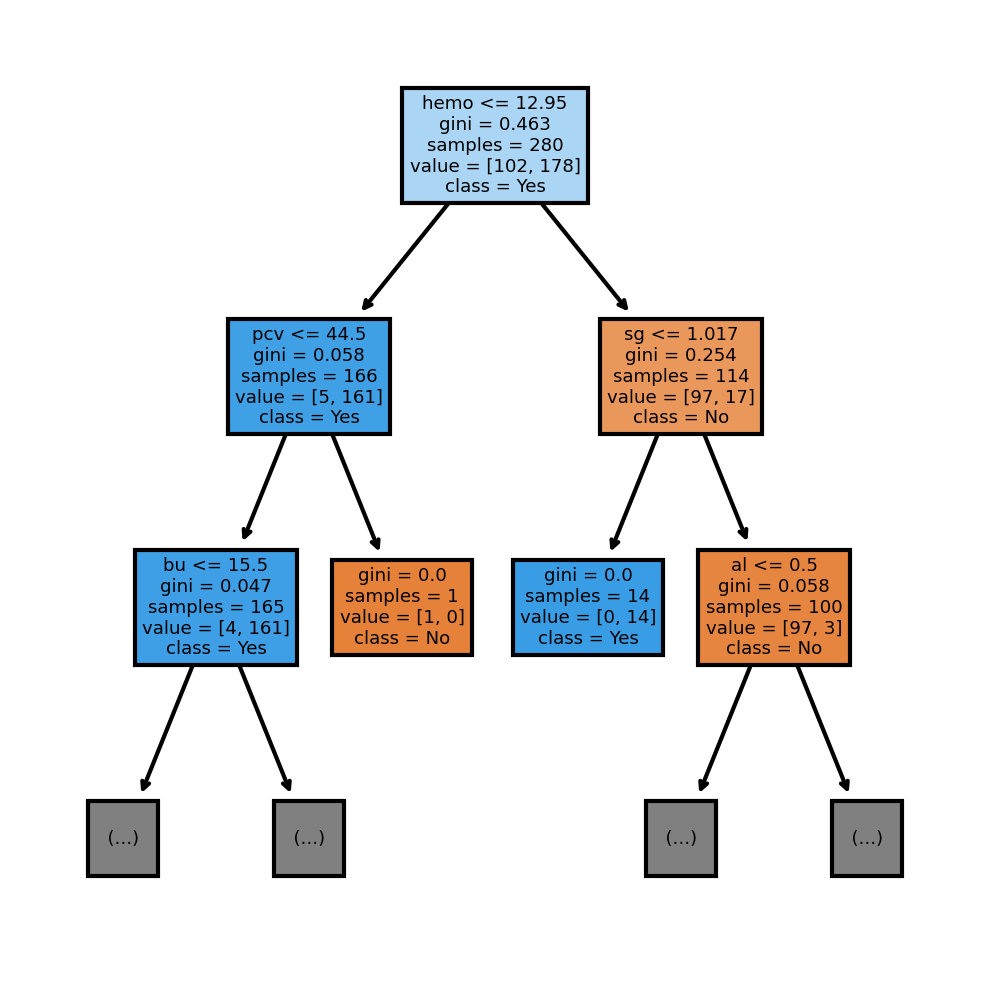

In [598]:
fig, axes = plt.subplots(
    nrows = 1,ncols = 1,figsize = (4,4), dpi=300
    )
plot_tree(
    dataX_dt, 
    max_depth= 2, 
    feature_names = X_train.columns.tolist(), 
    class_names=['No', 'Yes'], 
    filled = True
    )

Then we do the knn classifier.

In [599]:
X_bt = DecisionTreeRegressor(random_state = 0)

In [600]:
path = X_bt.cost_complexity_pruning_path(
    X_train, 
    y_train
    )
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [601]:
# fit the trees with each alpha
regs = []
for ccp_alpha in ccp_alphas:
    reg = DecisionTreeRegressor(random_state = 0, ccp_alpha=ccp_alpha) 
    reg.fit(X_train, y_train)
    regs.append(reg)

In [602]:
test_X_scores = [reg.score(X_test, y_test) for reg in regs]

In [603]:
depth = [reg.tree_.max_depth for reg in regs]

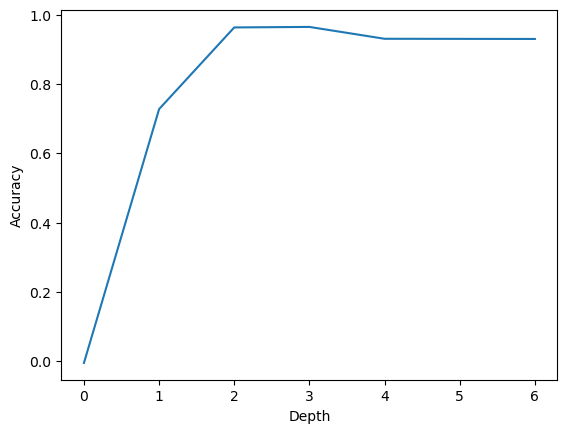

In [604]:
plt.plot(depth, test_X_scores)
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.xticks(range(min(depth), max(depth) + 1))
plt.show()

In [605]:
#to find the maximum depth
max_depth = depth[test_X_scores.index(max(test_X_scores))]
print("Maximum Depth with Highest Accuracy:", max_depth)


Maximum Depth with Highest Accuracy: 3


In [606]:
reg_X = DecisionTreeRegressor(max_depth = 3)
reg_X.fit(dataX, y)

DecisionTreeRegressor(max_depth=3)

[Text(0.5416666666666666, 0.875, 'hemo <= 13.05\nsquared_error = 0.234\nsamples = 400\nvalue = 0.625'),
 Text(0.3333333333333333, 0.625, 'rbcc <= 5.1\nsquared_error = 0.036\nsamples = 238\nvalue = 0.962'),
 Text(0.16666666666666666, 0.375, 'bu <= 15.5\nsquared_error = 0.017\nsamples = 232\nvalue = 0.983'),
 Text(0.08333333333333333, 0.125, 'squared_error = 0.24\nsamples = 5\nvalue = 0.6'),
 Text(0.25, 0.125, 'squared_error = 0.009\nsamples = 227\nvalue = 0.991'),
 Text(0.5, 0.375, 'hemo <= 12.325\nsquared_error = 0.139\nsamples = 6\nvalue = 0.167'),
 Text(0.4166666666666667, 0.125, 'squared_error = 0.0\nsamples = 1\nvalue = 1.0'),
 Text(0.5833333333333334, 0.125, 'squared_error = 0.0\nsamples = 5\nvalue = 0.0'),
 Text(0.75, 0.625, 'sg <= 1.017\nsquared_error = 0.113\nsamples = 162\nvalue = 0.13'),
 Text(0.6666666666666666, 0.375, 'squared_error = 0.0\nsamples = 18\nvalue = 1.0'),
 Text(0.8333333333333334, 0.375, 'al <= 0.5\nsquared_error = 0.02\nsamples = 144\nvalue = 0.021'),
 Text(0.

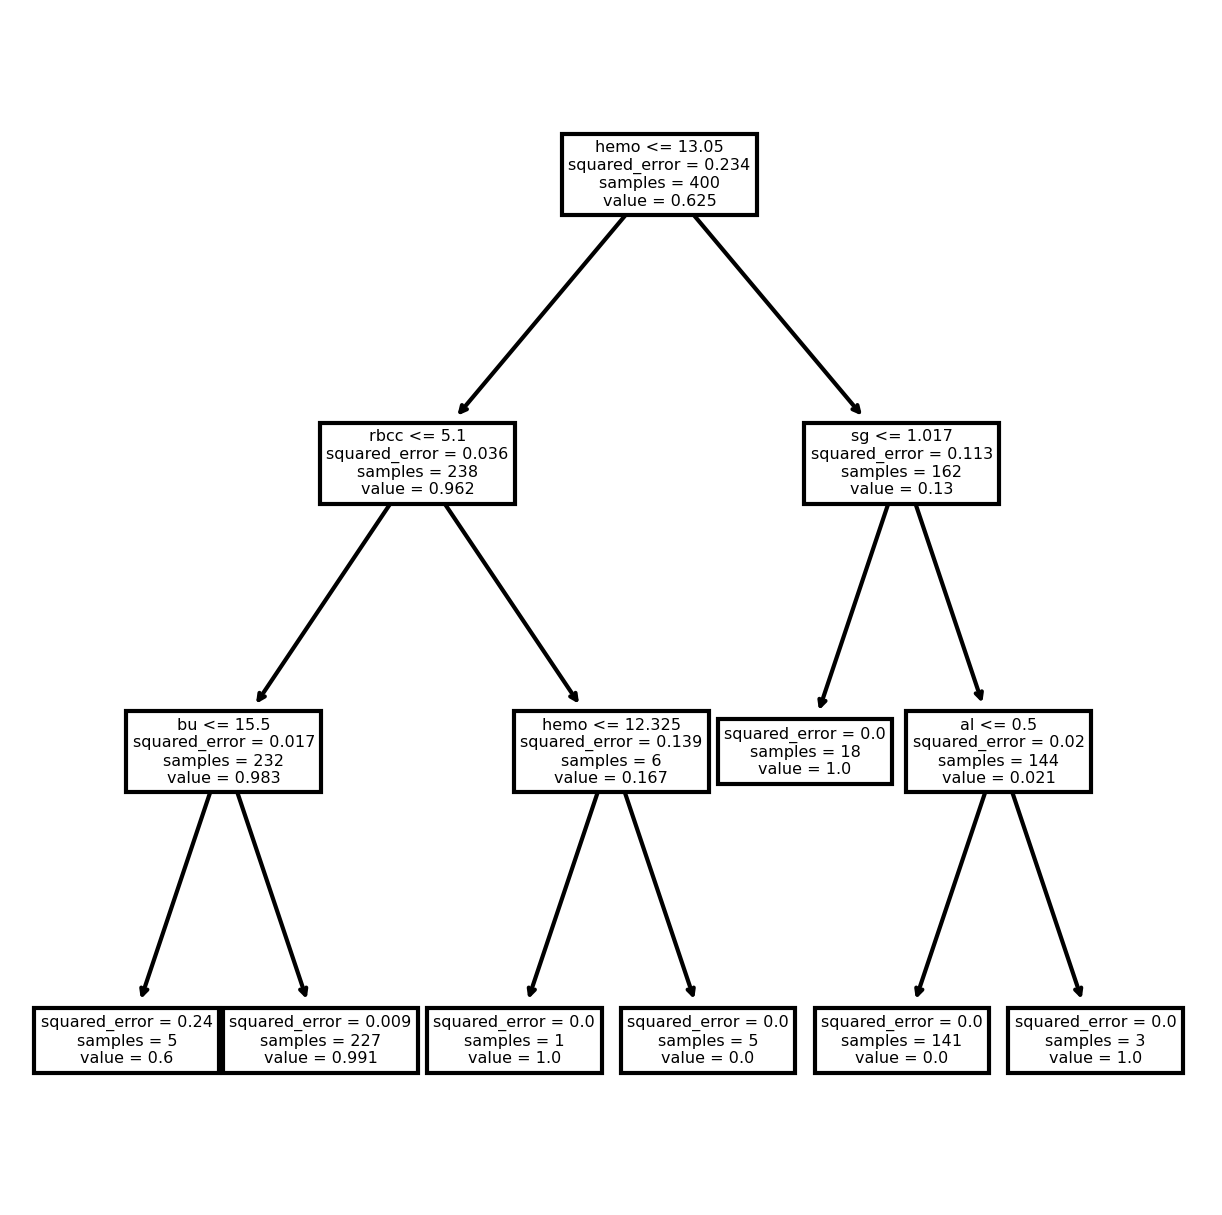

In [607]:
fig, axes = plt.subplots(
    nrows = 1,
    ncols = 1,
    figsize = (5,5), 
    dpi=300
    )
plot_tree(
    reg_X, 
    max_depth = 3,
    feature_names = dataX.columns.tolist()
)

Here we do the knn classifier.

In [608]:
#scale
dataX_scaled = scale(dataX, axis=1)

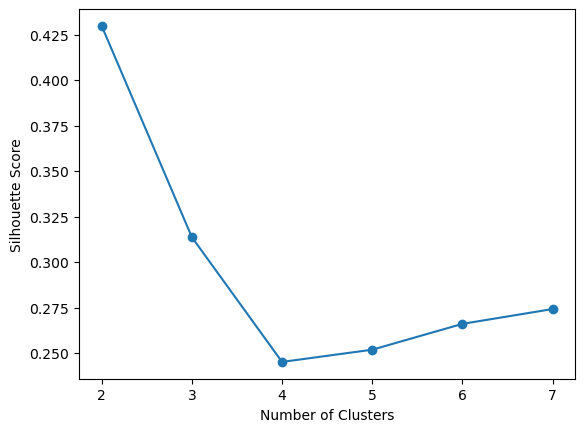

In [609]:
#KNN
k_values = range(2, 8) 

silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init = 20,random_state=0)
    clusters = kmeans.fit_predict(dataX_scaled)
    
    silhouette_avg = silhouette_score(dataX_scaled, clusters)
    silhouette_scores.append(silhouette_avg)


plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

Here, we choose the highest point k=2 for our further analysis.

In [610]:
km2 = KMeans(n_clusters=2, n_init=20, random_state=0)
km2.fit(dataX_scaled)
km2.labels_

array([1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [611]:
pd.Series(km2.labels_).value_counts()

1    301
0     99
dtype: int64

In [612]:
#K=2
cluster_labels_km2 = km2.fit_predict(dataX_scaled)
silhouette_score(dataX_scaled, cluster_labels_km2).round(2)

0.43

Then we enhance the peformance of models and make comparison.

In [613]:
XS_train, XS_test, yS_train, yS_test = train_test_split(
    dataX_scaled, 
    y, 
    test_size=0.3, 
    random_state=0
    )

In [614]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.metrics import confusion_matrix

In [615]:
knn2 = neighbors.KNeighborsClassifier(
n_neighbors = 2,
algorithm = 'brute'
)
knn2.fit(XS_train, yS_train)

/Users/daisy/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(algorithm='brute', n_neighbors=2)

In [616]:
pred2 = knn2.predict(XS_test)
pred2

array([1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0])

In [617]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(yS_test, pred2)
conf_matrix

array([[43,  5],
       [17, 55]])

In [618]:
metrics.accuracy_score(yS_test, pred2)

0.8166666666666667

For the decision tree classifier, 
1. Based on two plots of the decision tree method, we have observed that the major decision point does not change in our modified work.
2. Meanwhile, those two plots do have some differences. From the previous plot, we display a decision tree plot splitting into 5 obvious variables. Nevertheless, the following plot shows an improved decision tree plot with more variables correlated to the response "y" and the adjustment of its order, implying a more detailed split.
For the knn claasifier,
1. We used the cluster to find the best fitted k-value for our model;
2. By enhance the performance of our model, our accurancy improved to 0.816667, which is a very good accurancy performance, it strengthened the credibility of the model.

Compare these two classifiers, we prefer the decision tree has a better performance. KNN is easy to understand and apply algorithm that is straightforward and intuitive. However, decision tree can directly show the correlation between variables and our classification, which is better than knn classifier.

13. Interpretable Classifier Insight.

In [619]:
feature_importances = reg_X.feature_importances_
sorted_indices = feature_importances.argsort()[::-1]
sorted_feature_names = X.columns[sorted_indices]
sorted_importances = feature_importances[sorted_indices]

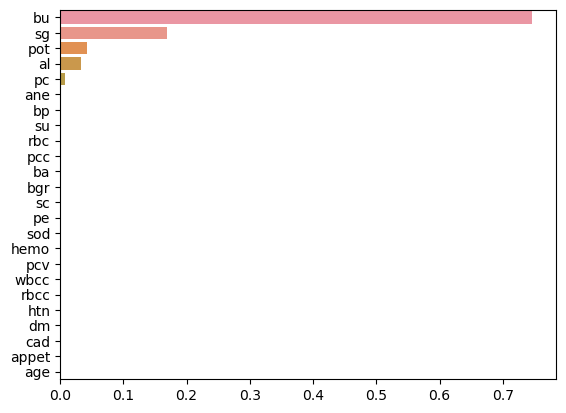

In [620]:
sns.barplot(x = sorted_importances, y = sorted_feature_names)
plt.show()

1. From the decision tree above, we can find that the variables 'bu', 'sg', 'pot', 'al', 'pc' are most significant predict variables to our classification. 
2. In aspects of its chanllenges, the approach of decision tree might lead to sensitive issue. Since it contains large variance, the small difference in the training data may drive to huge variability and implement a completely different graph.

15. Distribution.
Ying Cui (400296443): Contribute to each question, contribute to the coding part, did the analysis of data output;
Jiaxin Yu (400318460): Contribute to each question, contribute to the coding part, did the analysis of data output;


16. Link.

In [ ]:
git init

\newpage

## Grading scheme 

\begin{table}[H]
\begin{tabular}{p{0.15\textwidth}  p{0.65\textwidth}}
1.   & Answer [1]\\
2.   & Codes [2] \\
     & OR answer [2]\\
3.   & Codes [3] and answer [3]\\
4.   & Codes [2] and answer [3]\\
5.   & Codes [2]\\
     & OR answer [2]\\
6.   & Codes [2] \\
     & OR answer [2]\\
7.   & Codes [3] and Plot [1]\\
8.   & Codes [1]\\
9.   & Answers [2]\\
10.   & Describe the two metrics [2]\\
11.   & Codes [2] \\
      & these codes can be included in (12)\\
12.   & Codes (two classifiers training,\\
     & model selection for each classifier, \\
     & classifiers comparisons) [5] and answer [2]\\
13.   & Codes [1] and answers [2]\\
14.   & Codes and comparison will \\
     & give \textbf{bonus 2 points for the final grade}.\\
\end{tabular}
\end{table}

**The maximum point for this assignment is 39. We will convert this to 100%.**

**All group members will receive the same grade if they contribute to the same.**
